In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/road-accidents-in-the-czech-republic/pedestrian.csv
/kaggle/input/road-accidents-in-the-czech-republic/road_accidents_czechia_2016_2022.csv


# Introduction

Assalamu alaikum, today we are gonna analysis and do visualization on data with is about car accidents in Czech Republic.

![](https://www.eurotunnel.com/media/articles/a%20road%20trip%20to%20the%20czech%20republic/0-a-road-trip-to-the-czech-republic.jpeg?width=1920)

# Downloading data.

First thing we should do are importing all libraries we need and then creating Pandas Data Frame from csv file.

In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('/kaggle/input/road-accidents-in-the-czech-republic/road_accidents_czechia_2016_2022.csv')
df.head()

,id,communication_kind,date,time,accident_kind,crash_kind,fixed_precaution_kind,injury,cause_of_accident,alcohol,...,way_of_releasing_persons_from_the_vehicle,direction_of_movement,damage_to_the_vehicle(in_hundred_crowns),driver_category,driver_condition,driver_external_influence,city,street,road_type,location
0,6.004418e+10,Highways,2018-01-01,1625.0,collision with forest animals,not an option It is not a collision between mo...,not an option not a collision with a fixed obs...,0.0,"forest game, domestic animals",not detected,...,there was no need to use violence,moving vehicle - in the measure of stationary ...,800.0,with a driving licence of category B,good no adverse circumstances were found,the driver was not affected,outside the municipality,NaN,Highways,outside the village
1,6.004418e+10,Highways,2018-02-02,850.0,collision with a fixed obstacle,not an option It is not a collision between mo...,lever,0.0,driver of a motor vehicle,ne,...,there was no need to use violence,moving vehicle - in the measure of stationary ...,600.0,with a driving licence of category B,good no adverse circumstances were found,the driver was not affected,outside the municipality,NaN,Highways,outside the village
2,6.004418e+10,Highways,2018-03-01,1959.0,collision with forest animals,not an option It is not a collision between mo...,not an option not a collision with a fixed obs...,0.0,"forest game, domestic animals",not detected,...,there was no need to use violence,moving vehicle - in the measure of stationary ...,300.0,with a driving licence of category B,good no adverse circumstances were found,the driver was not affected,outside the municipality,NaN,Highways,outside the village
3,6.004418e+10,Highways,2018-04-06,2560.0,collision with a fixed obstacle,not an option It is not a collision between mo...,lever,0.0,driver of a motor vehicle,not detected,...,"undetected, driver drove off","undetected, driver drove off",0.0,"undetected, driver drove off","undetected, driver drove off","undetected, driver drove off",outside the municipality,NaN,Highways,outside the village
4,6.004418e+10,Highways,2018-04-18,2560.0,collision with a fixed obstacle,not an option It is not a collision between mo...,lever,0.0,driver of a motor vehicle,not detected,...,"undetected, driver drove off","undetected, driver drove off",0.0,"undetected, driver drove off","undetected, driver drove off","undetected, driver drove off",outside the municipality,NaN,Highways,outside the village


# General Analysis

Now we do some general analysis on it.

In [3]:
df.shape

(707027, 46)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707027 entries, 0 to 707026
Data columns (total 46 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   id                                                             700689 non-null  float64
 1   communication_kind                                             700689 non-null  object 
 2   date                                                           700689 non-null  object 
 3   time                                                           700689 non-null  float64
 4   accident_kind                                                  700689 non-null  object 
 5   crash_kind                                                     700689 non-null  object 
 6   fixed_precaution_kind                                          700689 non-null  object 
 7   injury                                         

You can see we have 46 columns and 707027 rows in our data, this is a really big information.

# Creating new features

We can create some usefull columns from date column such as day, day_of_week, month and year, these columns will be very usefull for analysis.

In [5]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day.fillna(0).astype(int)
df['day_of_week'] = df['date'].dt.dayofweek.fillna(0).astype(int)
df['day_of_week'] = df['day_of_week'] + 1
df['month'] = df['date'].dt.month.fillna(0).astype(int)
df['year'] = df['date'].dt.year.fillna(0).astype(int)

df[['date', 'day', 'day_of_week', 'month', 'year']].head()

,date,day,day_of_week,month,year
0,2018-01-01,1,1,1,2018
1,2018-02-02,2,5,2,2018
2,2018-03-01,1,4,3,2018
3,2018-04-06,6,5,4,2018
4,2018-04-18,18,3,4,2018


# Number of accidents according to time.


In the next cell we "draw" 4 barplots with are:
1. Total accidents per year.
2. Total accidents per month.
3. Total accidents per day of week.
4. Total accidents per day of month.

/tmp/ipykernel_18/1255228772.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])


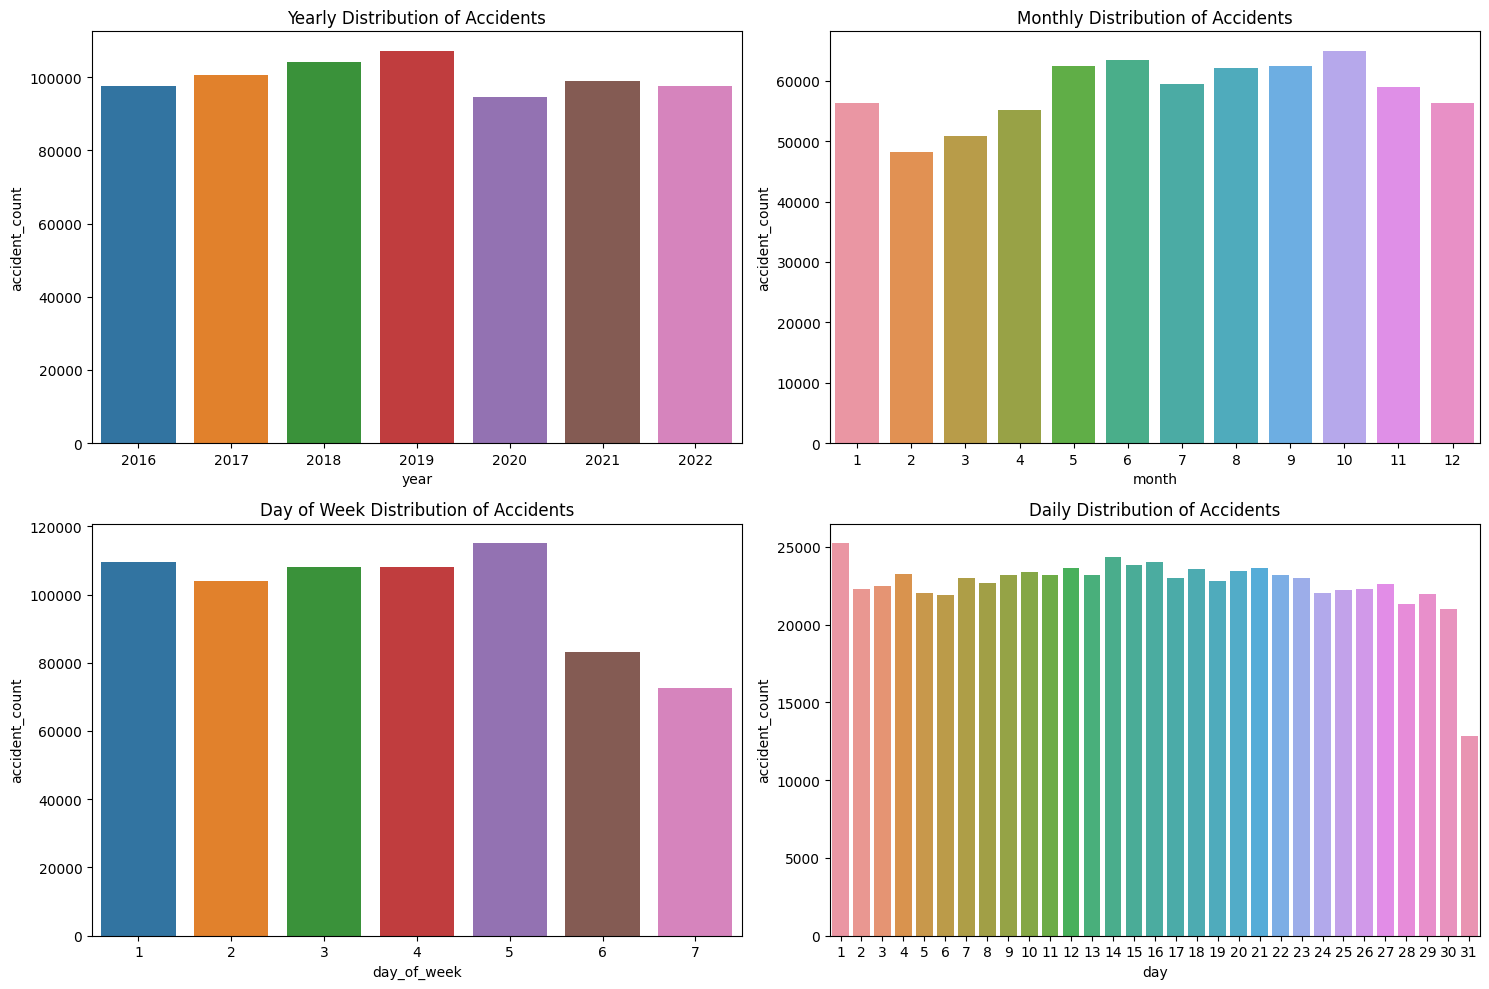

In [6]:
df_filtered = df[df['day'] != 0]

df_filtered['date'] = pd.to_datetime(df_filtered['date'])

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.barplot(data=df_filtered.groupby('year').size().reset_index(name='accident_count'), x='year', y='accident_count')
plt.title('Yearly Distribution of Accidents')

plt.subplot(2, 2, 2)
sns.barplot(data=df_filtered.groupby('month').size().reset_index(name='accident_count'), x='month', y='accident_count')
plt.title('Monthly Distribution of Accidents')

plt.subplot(2, 2, 3)
sns.barplot(data=df_filtered.groupby('day_of_week').size().reset_index(name='accident_count'), x='day_of_week', y='accident_count')
plt.title('Day of Week Distribution of Accidents')

plt.subplot(2, 2, 4)
sns.barplot(data=df_filtered.groupby('day').size().reset_index(name='accident_count'), x='day', y='accident_count')
plt.title('Daily Distribution of Accidents')

plt.tight_layout()
plt.show()

We can take some usefull output from these charts:

1. There is slight decrease in number of accidents after 2020, most likely it is due to pandemic.

2. In february, march and april there is occured less accidents, generally we can see strongly relationship between month of year and number accindents.

3. I think the strongest relation is in between day of week and number accindent, there is occured much less accidents in Saturday and Sunday, maybe it is due majority of people stay at home in these days.

4. As you can see there is no valueable relation between day of month and number of accidents.

# Total injured and killed people according to time.

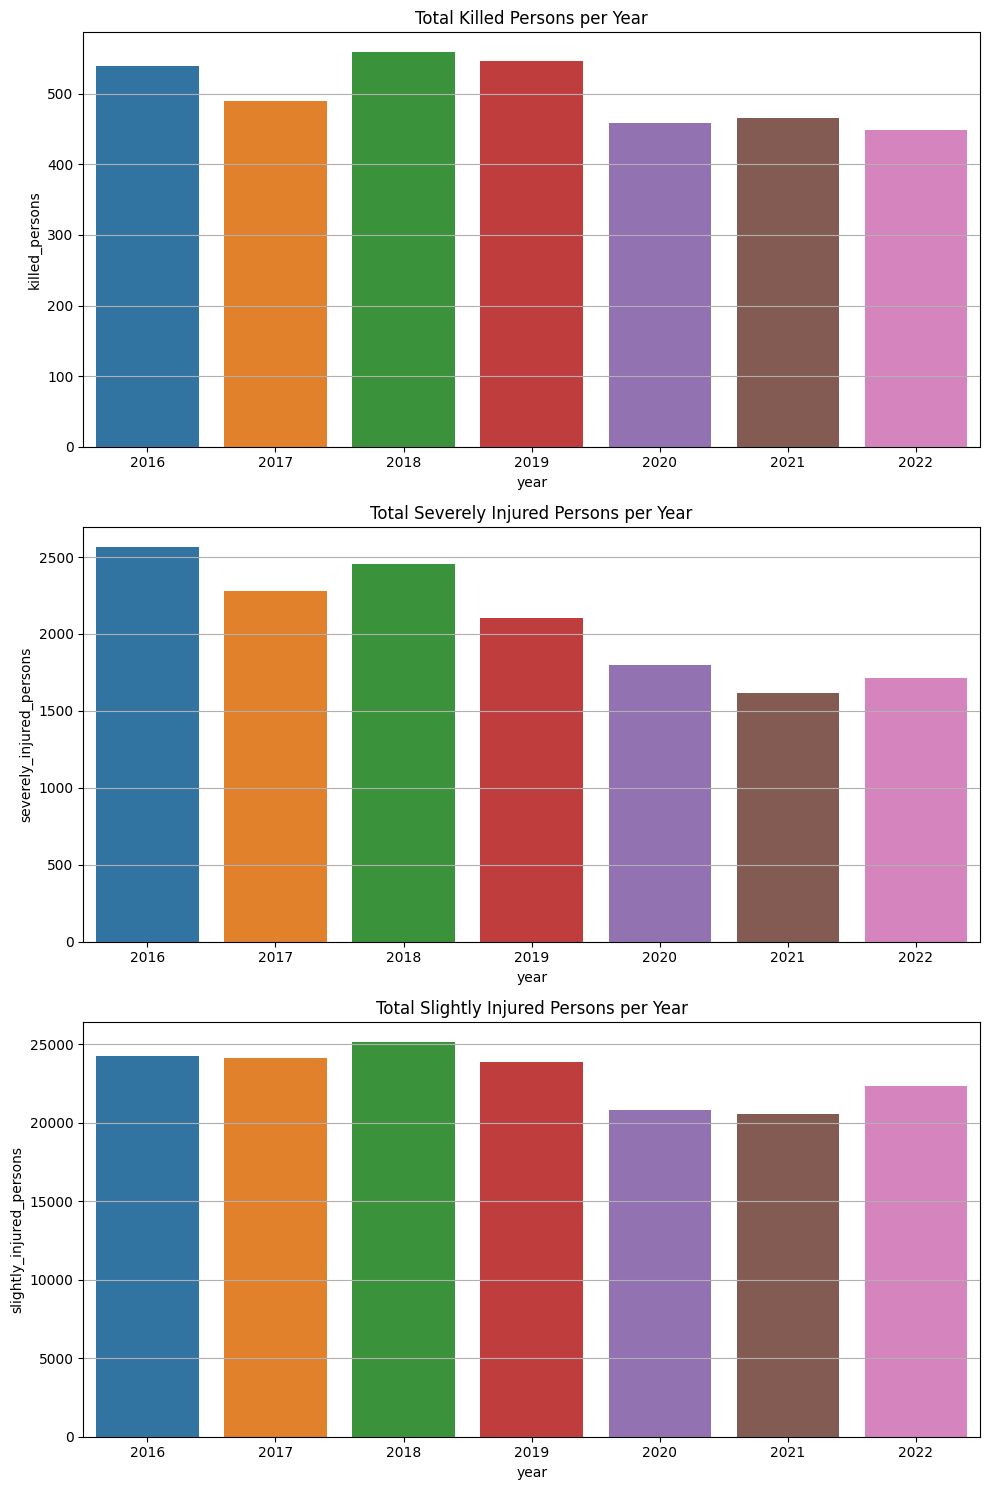

In [7]:
df_filtered = df[df['year'] != 0]

df_grouped = df_filtered.groupby('year').agg({
    'killed_persons': 'sum',
    'severely_injured_persons': 'sum',
    'slightly_injured_persons': 'sum'
}).reset_index()

plt.figure(figsize=(10, 15))

plt.subplot(3, 1, 1)
sns.barplot(data=df_grouped, x='year', y='killed_persons')
plt.title('Total Killed Persons per Year')
plt.grid(axis='y')

plt.subplot(3, 1, 2)
sns.barplot(data=df_grouped, x='year', y='severely_injured_persons')
plt.title('Total Severely Injured Persons per Year')
plt.grid(axis='y')

plt.subplot(3, 1, 3)
sns.barplot(data=df_grouped, x='year', y='slightly_injured_persons')
plt.title('Total Slightly Injured Persons per Year')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

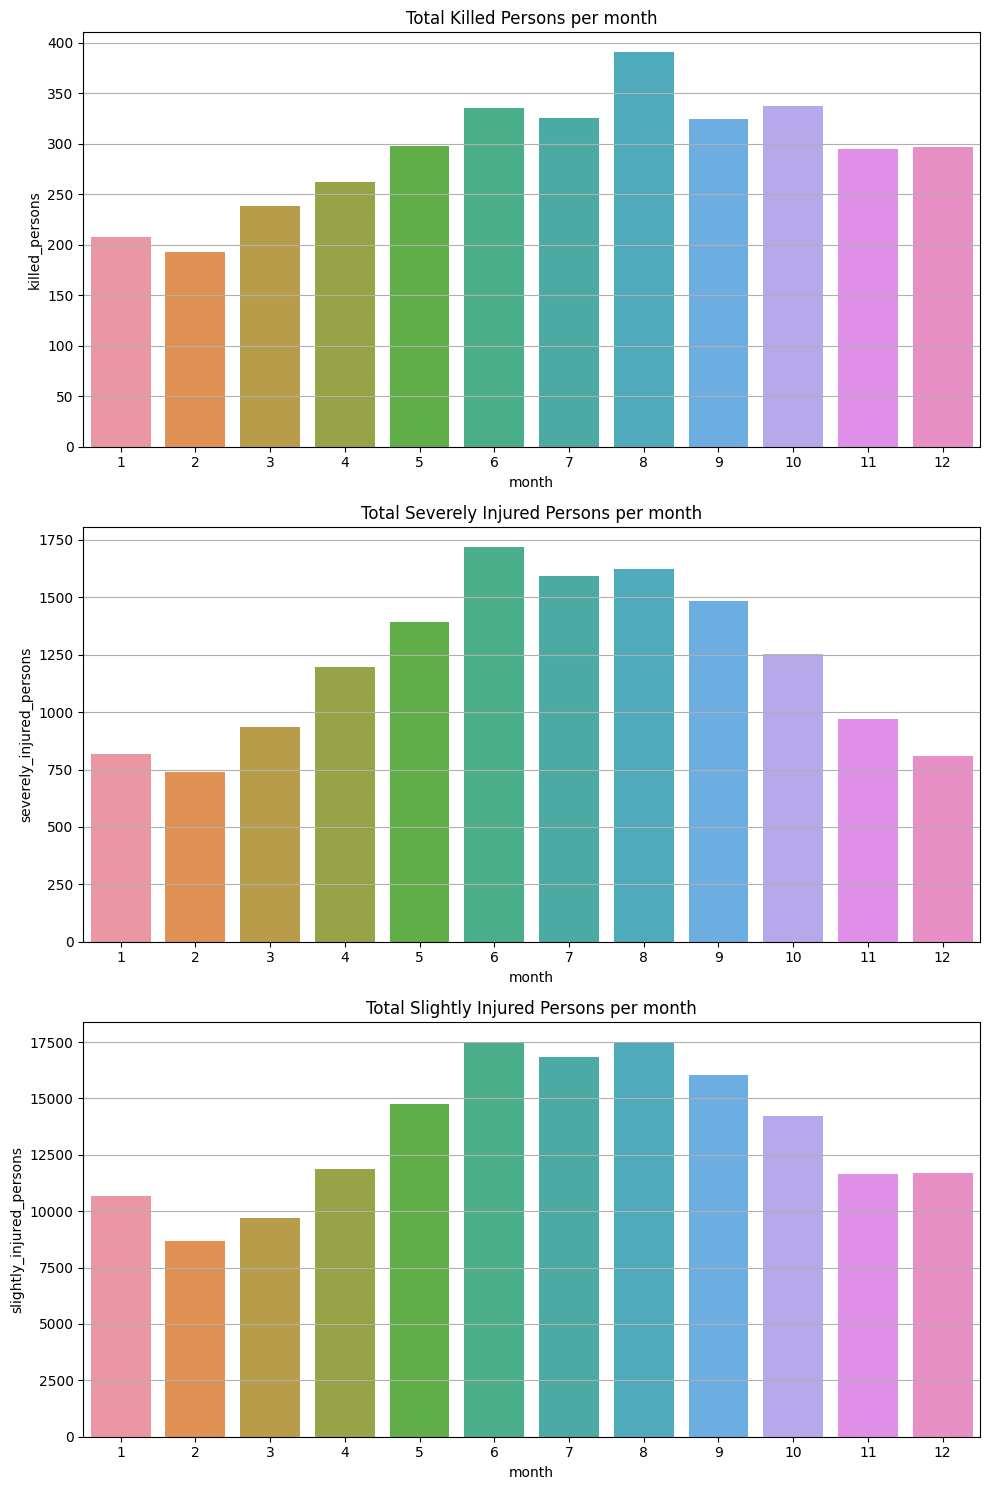

In [8]:
df_filtered = df[df['month'] != 0]

df_grouped = df_filtered.groupby('month').agg({
    'killed_persons': 'sum',
    'severely_injured_persons': 'sum',
    'slightly_injured_persons': 'sum'
}).reset_index()

plt.figure(figsize=(10, 15))

plt.subplot(3, 1, 1)
sns.barplot(data=df_grouped, x='month', y='killed_persons')
plt.title('Total Killed Persons per month')
plt.grid(axis='y')

plt.subplot(3, 1, 2)
sns.barplot(data=df_grouped, x='month', y='severely_injured_persons')
plt.title('Total Severely Injured Persons per month')
plt.grid(axis='y')

plt.subplot(3, 1, 3)
sns.barplot(data=df_grouped, x='month', y='slightly_injured_persons')
plt.title('Total Slightly Injured Persons per month')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

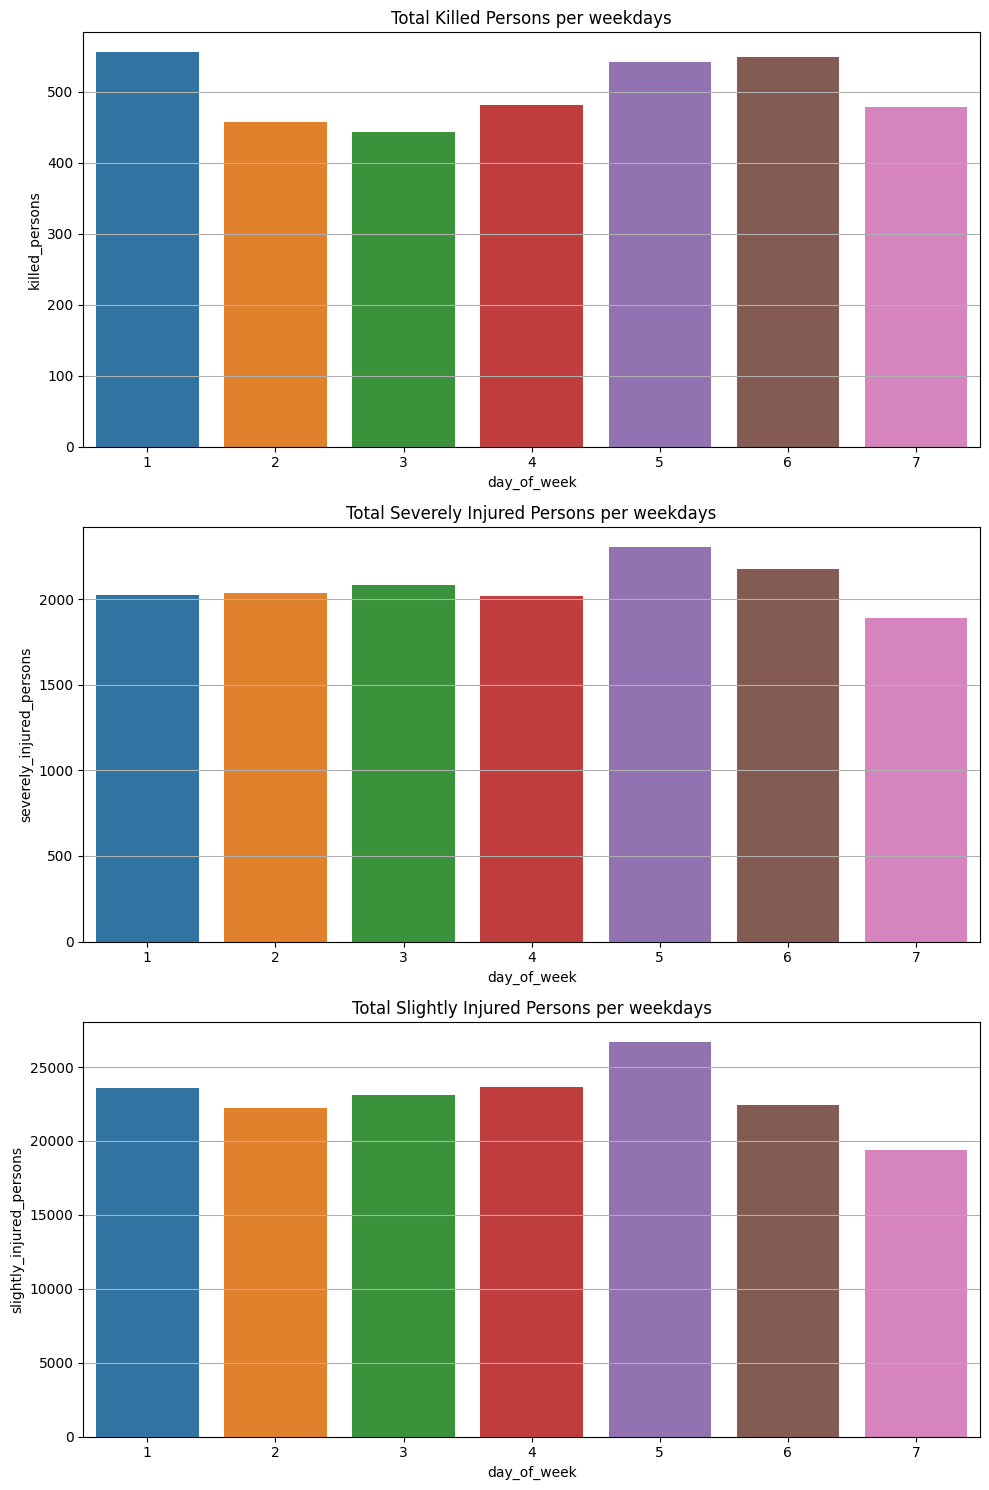

In [9]:
df_filtered = df[df['day_of_week'] != 0]

df_grouped = df_filtered.groupby('day_of_week').agg({
    'killed_persons': 'sum',
    'severely_injured_persons': 'sum',
    'slightly_injured_persons': 'sum'
}).reset_index()

plt.figure(figsize=(10, 15))

plt.subplot(3, 1, 1)
sns.barplot(data=df_grouped, x='day_of_week', y='killed_persons')
plt.title('Total Killed Persons per weekdays')
plt.grid(axis='y')

plt.subplot(3, 1, 2)
sns.barplot(data=df_grouped, x='day_of_week', y='severely_injured_persons')
plt.title('Total Severely Injured Persons per weekdays')
plt.grid(axis='y')

plt.subplot(3, 1, 3)
sns.barplot(data=df_grouped, x='day_of_week', y='slightly_injured_persons')
plt.title('Total Slightly Injured Persons per weekdays')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# "Delicious" Pie Charts

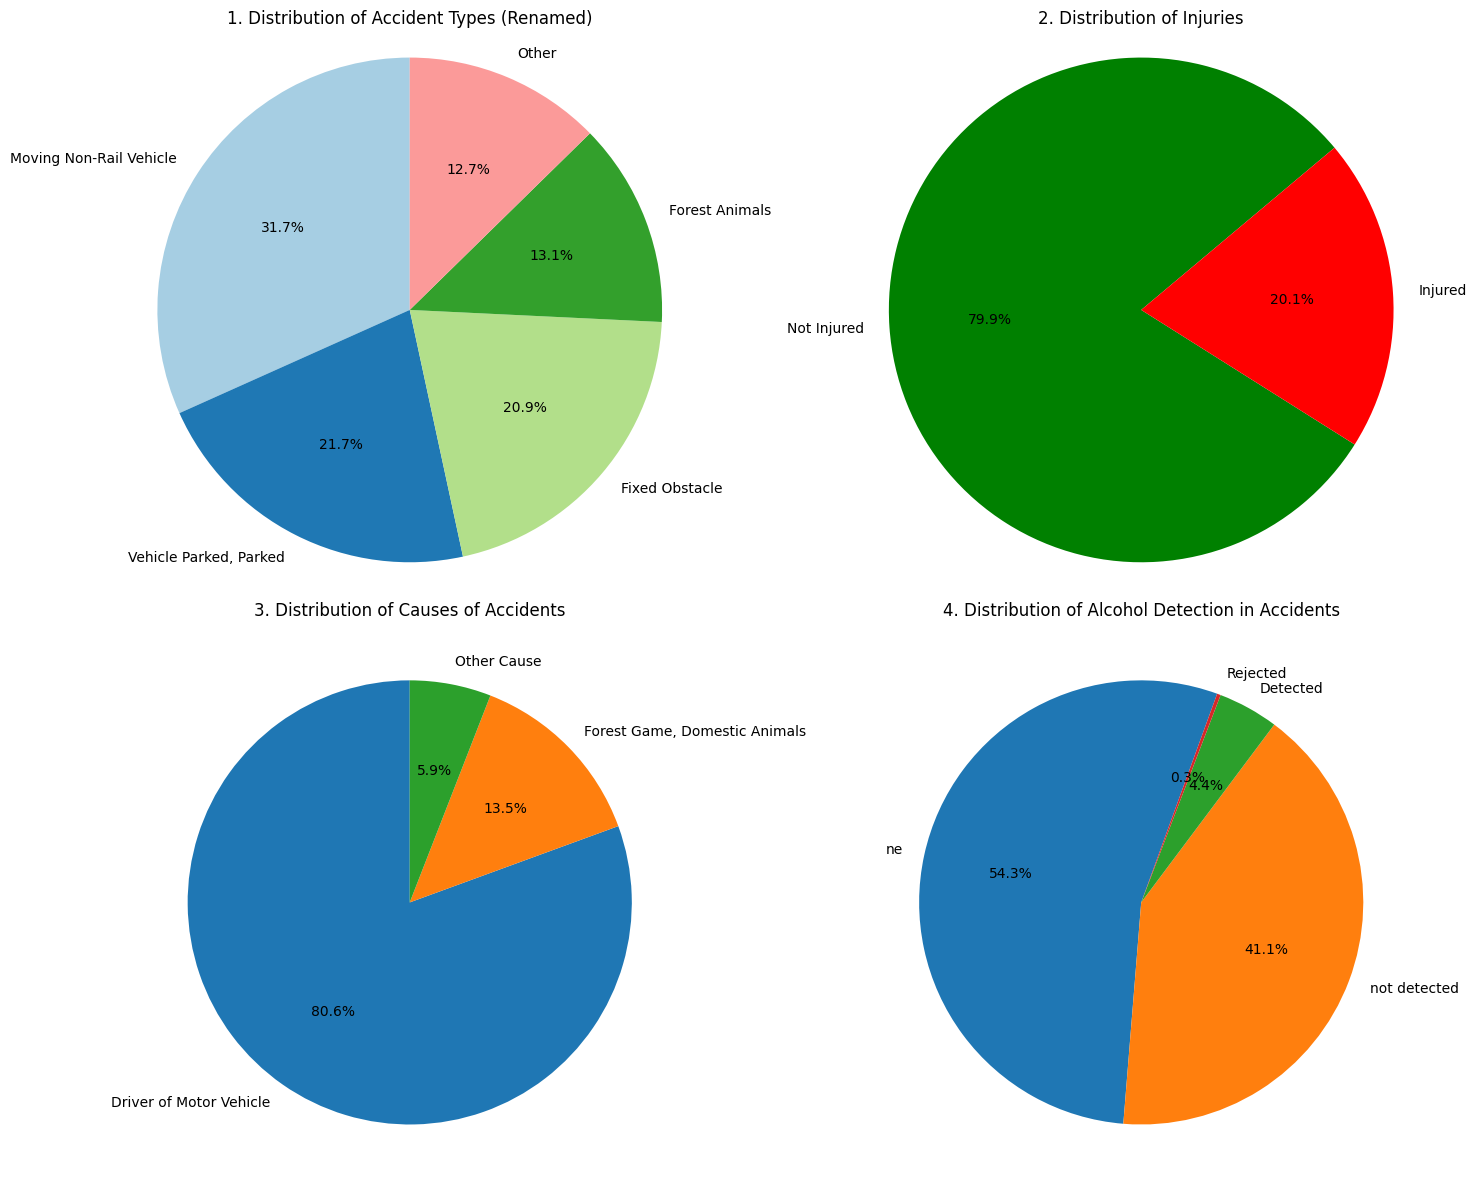

In [10]:
import matplotlib.pyplot as plt

rename_mapping = {
    'collision with a moving non-rail vehicle': 'Moving Non-Rail Vehicle',
    'collision with a vehicle parked, parked': 'Vehicle Parked, Parked',
    'collision with a fixed obstacle': 'Fixed Obstacle',
    'collision with forest animals': 'Forest Animals'
}

renamed_accident_kind = df['accident_kind'].map(rename_mapping).fillna('Other')

plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
labels = renamed_accident_kind.value_counts().index
sizes = renamed_accident_kind.value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.axis('equal')
plt.title('1. Distribution of Accident Types (Renamed)')

plt.subplot(2, 2, 2)
labels = ['Not Injured', 'Injured']
sizes = df['injury'].dropna().value_counts().sort_index().values
colors = ['green', 'red']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=400, colors=colors)
plt.axis('equal')
plt.title('2. Distribution of Injuries')

plt.subplot(2, 2, 3)
cause_counts = df['cause_of_accident'].map({
    'driver of a motor vehicle': 'Driver of Motor Vehicle',
    'forest game, domestic animals': 'Forest Game, Domestic Animals'
}).fillna('Other Cause').value_counts()
plt.pie(cause_counts, labels=cause_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('3. Distribution of Causes of Accidents')

plt.subplot(2, 2, 4)
df_alcohol_detected = df.copy()
df_alcohol_detected['alcohol'] = df_alcohol_detected['alcohol'].replace({
    'yes blood alcohol content between 0.5 ‰ and 0.8 ‰': 'Detected',
    'yes blood alcohol content 1.5‰ or more': 'Detected',
    'yes blood alcohol content up to 0.24 ‰': 'Detected',
    'yes blood alcohol content between 0.24 ‰ and 0.5 ‰': 'Detected',
    'yes blood alcohol content between 1.0 ‰ and 1.5 ‰': 'Detected',
    'yes blood alcohol content from 0.8‰ to 1.0‰': 'Detected'
})
alcohol_counts = df_alcohol_detected['alcohol'].value_counts()
plt.pie(alcohol_counts, labels=alcohol_counts.index, autopct='%1.1f%%', startangle=70)
plt.title('4. Distribution of Alcohol Detection in Accidents')

plt.tight_layout()
plt.show()


1. In first chart we can see types of accidents.

2. In second chart describes how many percent accidents occured with injury.

3. In third chart represents causes of accident.

4. In forth chart inform to us weather accident occured with alcohol.

# Distribution of car types involved in accindent.

I removed type of cars, because almost all of accidents occured with cars.

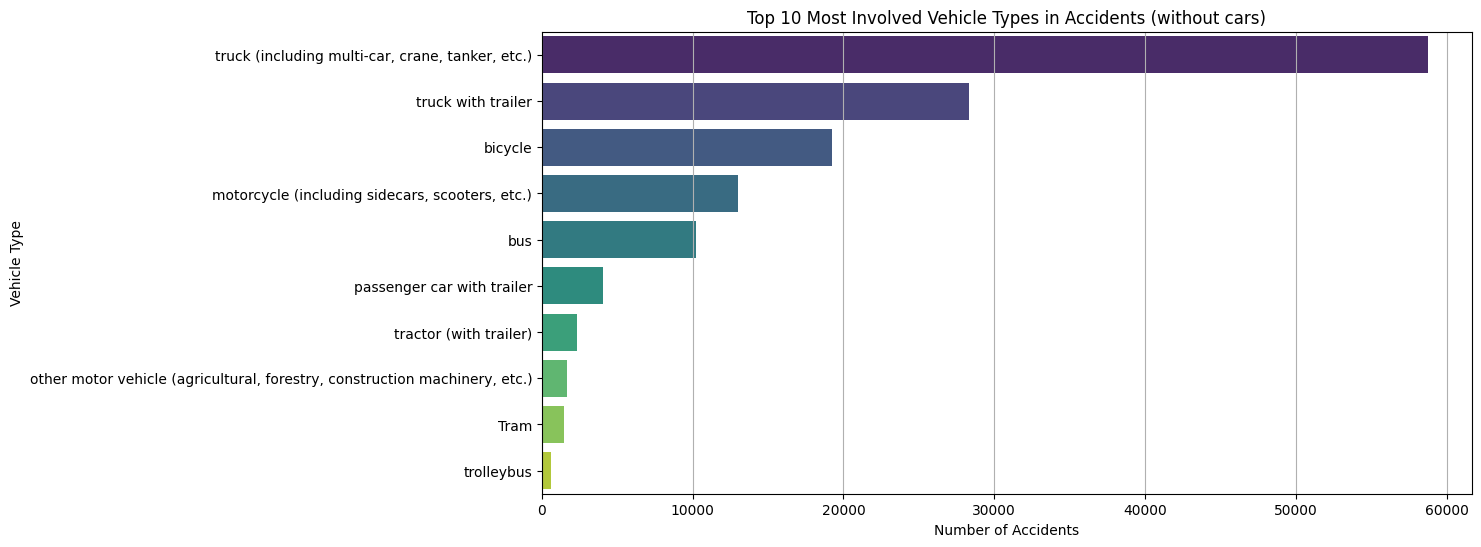

In [11]:
filtered_df = df[df['vehicle_type'].notna() & (df['vehicle_type'] != 'undetected, driver drove off') & (df['vehicle_type'] != 'passenger car without trailer')]

vehicle_counts = filtered_df['vehicle_type'].value_counts()

top_vehicle_types = vehicle_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_vehicle_types.values, y=top_vehicle_types.index, palette='viridis')

plt.xlabel('Number of Accidents')
plt.ylabel('Vehicle Type')
plt.title('Top 10 Most Involved Vehicle Types in Accidents (without cars)')
plt.grid(axis='x')

plt.show()

# The accident occured weather in normal visibility.

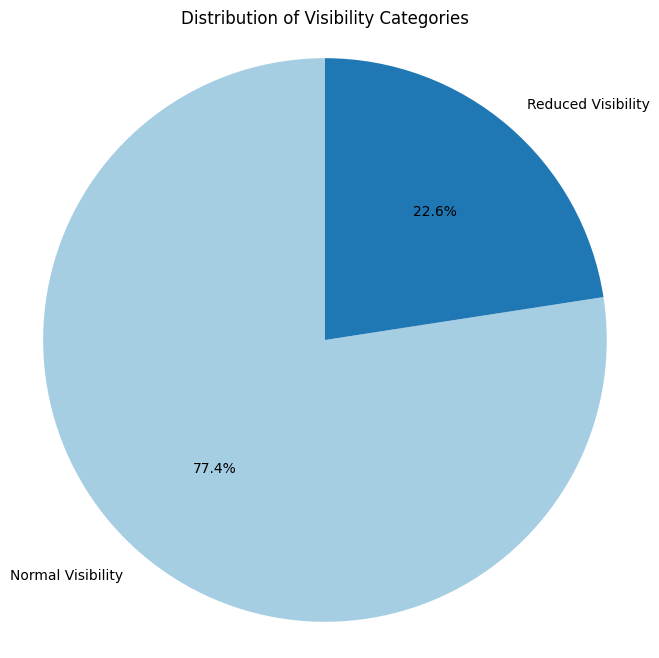

In [12]:
df['visibility_category'] = np.where(
    (df['visibility'].str.contains('Daytime visibility not impaired') |
     df['visibility'].str.contains('at night with public lighting, visibility not impaired')),
    'Normal Visibility',
    'Reduced Visibility'
)

visibility_counts = df['visibility_category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(visibility_counts, labels=visibility_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.axis('equal')
plt.title('Distribution of Visibility Categories')
plt.show()